# Autocorrelation

In [37]:
import xarray as xr
import ODLintake
from OOI_hydrophone_cloud import utils
from OOI_hydrophone_cloud.processing import processing
import pandas as pd
import hvplot.xarray
import numpy as np
from dask.distributed import Client

In [23]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 8
Total threads: 32,Total memory: 62.80 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36791,Workers: 8
Dashboard: http://127.0.0.1:8787/status,Total threads: 32
Started: Just now,Total memory: 62.80 GiB
Comm: tcp://127.0.0.1:43927,Total threads: 4
Dashboard: http://127.0.0.1:42963/status,Memory: 7.85 GiB
Nanny: tcp://127.0.0.1:37205,


In [8]:
ds = ODLintake.open_ooi_lfhydrophones()

In [13]:
ds = utils.slice_ds(ds, pd.Timestamp('2017-01-01'), pd.Timestamp('2017-05-01'), include_coord=False)

In [17]:
ds_auto = xr.Dataset({'node1':ds['AXCC1'], 'node2':ds['AXCC1']})

In [20]:
NCCFs = processing.compute_NCCF_stack(ds_auto, compute=False, stack=True)

In [ ]:
NCCFs = NCCFs.compute()

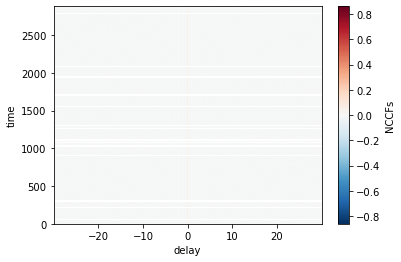

In [34]:
NCCFs.plot()

In [50]:
NCCFs201 = NCCFs.rolling(time=201, min_periods=1).mean()

In [55]:
NCCFs201[1000,:].hvplot()

:Curve   [delay]   (NCCFs)